# Semantic Similarities: Differences in distance among different sub-reddits
#### Benchmark is the askscience subreddit. An analysis in how far other subreddits (askmen, askwoman, democracts & republicans) deviate from this benchmark is conducted


In [15]:
import numpy as np
import pandas as pd
import torch


In [16]:
model = torch.load("/Users/fabianmahner/dlss-project24/output/fine_tuning_results/best_models_posts_2013/best_model_parameters_CBOW.pt") 

/var/folders/27/3fz42pcs07s3xvry5dtl0_9r0000gn/T/ipykernel_53957/3557404934.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("/Users/fabianmahner/dlss-

In [17]:
# Extract the embeddings
embeddings = model['embeddings.weight']

# Convert to a pandas DataFrame
df = pd.DataFrame(embeddings.numpy())

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.033714,0.045537,-0.928500,1.312873,0.597033,0.303046,0.086712,0.051661,0.987264,0.041167,...,-0.026212,-0.013327,0.261533,0.156048,-0.499789,-1.553334,0.385102,1.736410,0.073131,0.033081
1,-0.022753,-0.291965,-0.064619,-0.026148,-0.037443,-0.015495,0.135123,-0.079789,-0.021929,0.030197,...,0.010817,0.071428,-0.198438,0.123539,-0.000084,-0.020276,0.037563,-0.028239,0.000417,0.094062
2,-0.217138,0.214750,0.111614,-2.201133,0.335585,0.274217,0.060955,0.071320,0.154009,-0.011041,...,-0.192157,-0.607373,0.168432,0.136740,0.020027,1.453228,-0.119578,2.063332,0.005152,0.112209
3,-0.230191,0.045893,0.486410,1.461828,0.048614,-0.110692,-0.426133,0.057255,0.163660,-0.382031,...,0.434904,-0.572143,-0.098624,-0.180533,0.037706,0.783640,-0.183241,1.243339,0.058977,-0.196801
4,0.369994,-0.022490,1.640318,1.120058,0.759910,-0.493141,-0.536324,0.051797,1.260394,-0.051332,...,-0.588666,-1.233379,0.342731,-0.609789,-0.534924,0.830344,0.540209,-1.712241,0.021091,-0.558784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,-0.001942,0.032871,-0.005569,-0.002625,-0.009693,0.016193,0.031818,0.031072,-0.000339,-0.003553,...,0.005230,0.007117,-0.026990,0.014472,0.005432,-0.001259,-0.014348,-0.004110,0.015469,0.011057
3713,-0.011410,-0.000276,-0.018143,0.003077,-0.003914,0.004253,-0.061768,-0.017229,-0.021388,-0.071499,...,-0.013058,0.007181,0.017355,-0.000721,-0.012624,-0.004555,-0.020787,0.003999,0.030296,-0.018985
3714,0.047648,0.021392,0.014523,0.003219,-0.004187,-0.044707,0.009402,0.029717,0.000748,-0.062051,...,-0.020924,-0.001893,0.044336,-0.020919,-0.017526,-0.001053,0.019678,-0.013227,0.070852,0.038653
3715,0.048576,0.019379,-0.018131,-0.025379,0.006837,0.019891,0.002603,0.006372,-0.008224,-0.019232,...,-0.034518,-0.004530,0.051324,0.024628,0.004188,-0.022335,0.075330,-0.002309,0.046194,-0.010399


In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with 100 columns of embeddings

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of the variance
df_pca = pca.fit_transform(df_standardized)

# Convert the PCA result back to a DataFrame if needed
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# If you want to see the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)


Explained variance ratio: [0.08649381 0.05698743 0.04940549 0.04904535 0.04320831 0.04139052
 0.03874275 0.03667178 0.03220848 0.02962424 0.02848666 0.0277005
 0.0238659  0.02362578 0.02293373 0.0223136  0.0208832  0.02022451
 0.01951759 0.01904177 0.01823376 0.01789468 0.01720736 0.01620739
 0.01504468 0.01453827 0.01428676 0.0130603  0.01291259 0.01202714
 0.01190747 0.01139692 0.01128956 0.00984585 0.00934417 0.00897665
 0.00849715 0.00745977 0.00687443 0.00617376 0.0059744  0.00563869
 0.00468816]


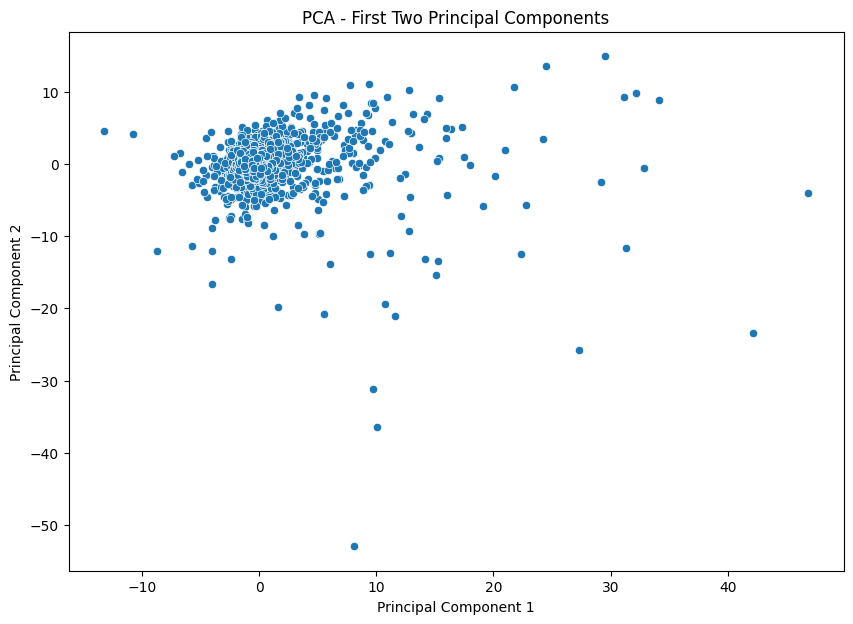

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_pca is your DataFrame after applying PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])

plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
